In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


**ЧАСТЬ 1**

Здание 1

In [6]:
df=pd.read_csv("data\logistic.csv", delimiter=",", header=None)
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_4212\305817969.py:1: SyntaxWarning: invalid escape sequence '\l'
  df=pd.read_csv("data\logistic.csv", delimiter=",", header=None)


,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750
5,1,1.454271,-0.665416
6,1,2.254227,2.263786
7,-1,-0.067580,1.469141
8,-1,-0.861961,-0.824856
9,1,0.699179,2.032488


Здание 2

In [8]:
class_counts = df[0].value_counts()
print(class_counts)

0
 1    105
-1    100
Name: count, dtype: int64


Здание 3

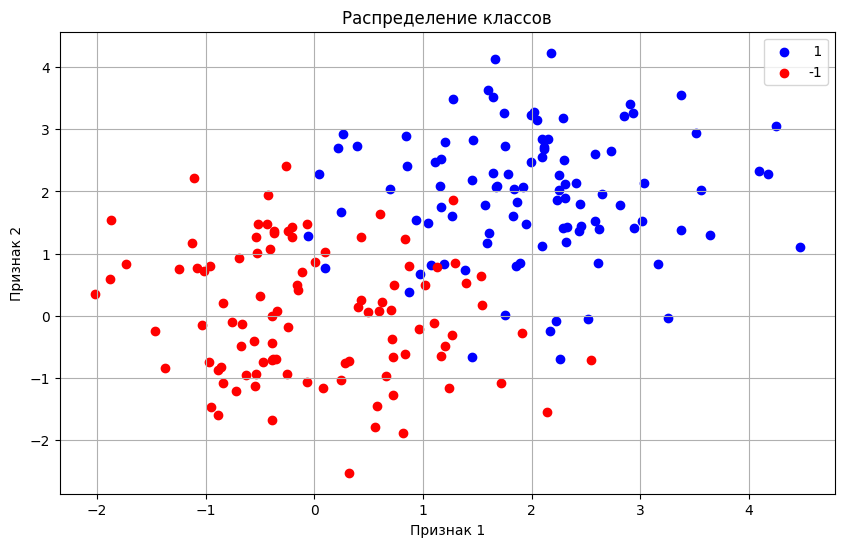

In [11]:
filtered_df = df[(df[1] >= -5) & (df[1] <= 5) & (df[2] >= -5) & (df[2] <= 5)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df[1][filtered_df[0] == 1], filtered_df[2][filtered_df[0] == 1], color='blue', label=' 1')
plt.scatter(filtered_df[1][filtered_df[0] == -1], filtered_df[2][filtered_df[0] == -1], color='red', label='-1')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Распределение классов')
plt.legend()
plt.grid()
plt.show()

Задание 4

In [12]:
X = filtered_df[[1, 2]].values
y = filtered_df[0].values 

Здание 5

In [14]:
model = LogisticRegression()
model.fit(X, y)

print("Гиперпараметры модели:")
print(model.get_params())

Гиперпараметры модели:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Здание 6

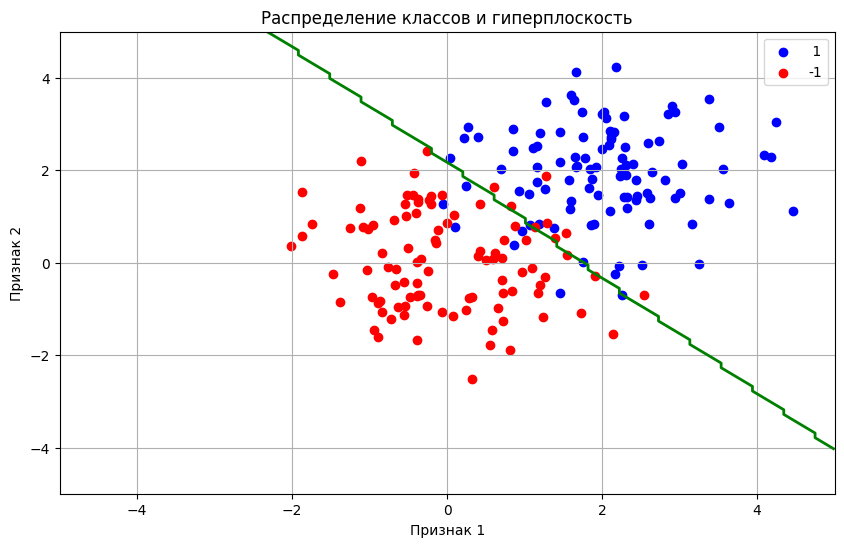

In [15]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df[1][filtered_df[0] == 1], filtered_df[2][filtered_df[0] == 1], color='blue', label=' 1')
plt.scatter(filtered_df[1][filtered_df[0] == -1], filtered_df[2][filtered_df[0] == -1], color='red', label='-1')
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Распределение классов и гиперплоскость')
plt.legend()
plt.grid()
plt.show()

Здание 7

In [17]:
y_pred = model.predict(X)

conf_matrix = confusion_matrix(y, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

Матрица ошибок:
[[92  8]
 [ 8 92]]


Пояснение: Как видно модель правильно предсказываем как в классе -1, как в 1, 92 точночти. Но есть недочёты,что модель подумала,что некоторые 8 случаем в двух моделях она посчитала за другой класс.  Но модель всё равно довольно хорошо справляется, даже с такими погрешностями

Задание 8

In [19]:
accuracy = accuracy_score(y, y_pred)

precision = precision_score(y, y_pred, pos_label=1)

recall = recall_score(y, y_pred, pos_label=1)

f1 = f1_score(y, y_pred, pos_label=1)

y_prob = model.predict_proba(X)[:, 1]
auc = roc_auc_score(y, y_prob)

# Вывод результатов
print(f"Доля правильных ответов (accuracy): {accuracy:.2f}")
print(f"Точность (precision): {precision:.2f}")
print(f"Полнота (recall): {recall:.2f}")
print(f"F-мера: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Доля правильных ответов (accuracy): 0.92
Точность (precision): 0.92
Полнота (recall): 0.92
F-мера: 0.92
AUC: 0.98


Пояснение: как видно по данным модель очень хорошо предсказываем по всем метрикам, она даёт 0.92,что для правильных ответов,что для точности, полноты и F-мера тоже хорошо сбалансирована между точностью и плотностью ответов, AUC говорит,что модель довольно хорошо отличает данных от положиетльных и отризательных

Задание 9

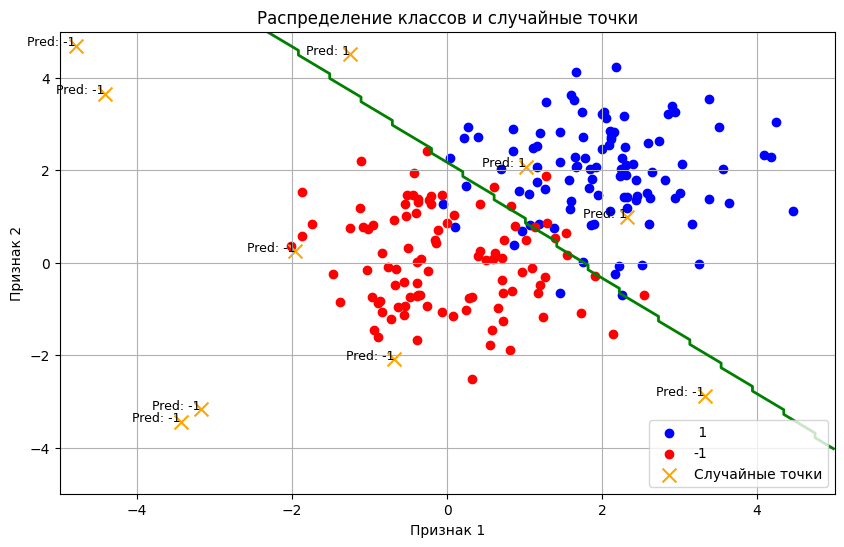

In [20]:
np.random.seed(42)
num_points = 10
random_points = np.random.uniform(-5, 5, (num_points, 2))

random_predictions = model.predict(random_points)

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df[1][filtered_df[0] == 1], filtered_df[2][filtered_df[0] == 1], color='blue', label=' 1')
plt.scatter(filtered_df[1][filtered_df[0] == -1], filtered_df[2][filtered_df[0] == -1], color='red', label='-1')
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')

plt.scatter(random_points[:, 0], random_points[:, 1], color='orange', label='Случайные точки', marker='x', s=100)
for i, point in enumerate(random_points):
    plt.text(point[0], point[1], f'Pred: {random_predictions[i]}', fontsize=9, ha='right')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Распределение классов и случайные точки')
plt.legend()
plt.grid()
plt.show()

**ЧАСТЬ 2**

Задание 1

In [30]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df.head(10))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


Задание 2

sepal length (cm)  - это длина чашелистика цветка ириса, измеренная в сантиметрах.

sepal width (cm) - ширина чашелистика цветка ириса, тоже в см.

petal length (cm)  - это длина лепестка цветка ириса.

petal width (cm) - это ширина лепестка цветка ириса


Здание 3

In [33]:
iris_df['target'] = iris.target
class_distribution = iris_df['target'].value_counts()
print(class_distribution)

target
0    50
1    50
2    50
Name: count, dtype: int64


Пояснение : каждый из трех классов содержит по 50 наблюдений, данная вобрка сбалансированная

Задание 4

In [35]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Задание 5

In [36]:
model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

max_iter=200 -  максимальное количество итераций для алгоритма оптимизации, данное значение можно увеличить,если что-то будет не сходиться 

Задание 6

In [38]:
probabilities = model.predict_proba(X_test)

predicted_probabilities = probabilities.max(axis=1)

probabilities_df = pd.DataFrame({
    'Значение верояности': predicted_probabilities,
    'Правильный ответ': y_test.values
})
print(probabilities_df.head())

   Значение верояности  Правильный ответ
0             0.827710                 1
1             0.946943                 0
2             0.998451                 2
3             0.792189                 1
4             0.774084                 1


Задание 7

In [39]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Пояснение: смотря на матрицу ошибок,можно понять,что каждый класс определил всои значение на ура и не было допущено не одной ошибки! Модель работает прекрасно

Задание 8

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

y_prob = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f"Доля правильных ответов (accuracy): {accuracy:.2f}")
print(f"Точность (precision): {precision:.2f}")
print(f"Полнота (recall): {recall:.2f}")
print(f"F-мера: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Доля правильных ответов (accuracy): 1.00
Точность (precision): 1.00
Полнота (recall): 1.00
F-мера: 1.00
AUC: 1.00


Пояснение: смотря на данные,можно понять,что модель даёт прекрасный результат,потому что доля правильных ответ составляет 1!, а тут уже и точность и полнота тоже даёт 1, а F-мера отлично сбалансирована))) 

Задание 9

In [ ]:
svm_model = SVC(probability=True)

svm_model.fit(X_train, y_train)

y_svm = svm_model.predict(X_test)

svm_conf_matrix = confusion_matrix(y_test, y_svm)
print(svm_conf_matrix)

svm_accuracy = accuracy_score(y_test, y_svm)
svm_precision = precision_score(y_test, y_svm, average='weighted')
svm_recall = recall_score(y_test, y_svm, average='weighted')
svm_f1 = f1_score(y_test, y_svm, average='weighted')

svm_y_prob = svm_model.predict_proba(X_test)
svm_auc = roc_auc_score(y_test, svm_y_prob, multi_class='ovr')

print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'SVM Precision: {svm_precision:.2f}')
print(f'SVM Recall: {svm_recall:.2f}')
print(f'SVM F1 Score: {svm_f1:.2f}')
print(f'SVM AUC: {svm_auc:.2f}')

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
SVM Accuracy: 1.00
SVM Precision: 1.00
SVM Recall: 1.00
SVM F1 Score: 1.00
SVM AUC: 1.00


Пояснение: при сравнение качеств, то ответ как можно видеть одинаковый,что при логической,что при помощи метода SVM